In [1]:
import os
import torch
from torch import optim
from torch.optim.lr_scheduler import StepLR
from torch import nn
from torch.nn import functional as F

from tvae.data.mnist import DualTransformPreprocessor, PersepctivePreprocessor, Preprocessor
from tvae.containers.tvae import TVAE
from tvae.models.mlp import MLP_Encoder, MLP_Decoder
from tvae.containers.encoder import Gaussian_Encoder
from tvae.containers.decoder import Bernoulli_Decoder
from tvae.containers.grouper import Chi_Squared_Capsules_from_Gaussian_1d
from tvae.utils.logging import configure_logging, get_dirs
from tvae.utils.train_loops import train_epoch, eval_epoch
# At the top of your script
from tvae.data.transforms import To_Color


%reload_ext autoreload
%autoreload 2

In [13]:
#ROTCOLOR MNIST
config = {
    'wandb_on': False,
    'lr': 1e-4,
    'momentum': 0.9,
    'batch_size': 8,
    'max_epochs': 100,
    'eval_epochs': 5,
    'dataset': 'MNIST',
    'train_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340', 
    'train_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'train_scale_set': '1.0',
    'test_scale_set': '1.0',
    'pct_val': 0.2,
    'random_crop': 28,
    'seed': 1,
    'n_caps': 18,
    'cap_dim': 18,
    'n_transforms': 18,
    'mu_init': 30.0,
    'n_off_diag': 1,
    'group_kernel': (13, 13, 1),
    'train_eq_loss': False,
    'n_is_samples': 10
    }

name = 'TVAE_Rotation&Color-MNIST_L=13/36_K=3'

config['savedir'], config['data_dir'], config['wandb_dir'] = get_dirs()

savepath = os.path.join(config['savedir'], name)
preprocessor = DualTransformPreprocessor(config)
train_loader, val_loader, test_loader = preprocessor.get_dataloaders(batch_size=config['batch_size'])

In [2]:
#PERSPECTIVE MNIST

config = {
    'wandb_on': False,
    'lr': 1e-4,
    'momentum': 0.9,
    'batch_size': 8,
    'max_epochs': 100,
    'eval_epochs': 5,
    'dataset': 'MNIST',
    'train_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340', 
    'train_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'train_scale_set': '1.0',
    'test_scale_set': '1.0',
    'pct_val': 0.2,
    'random_crop': 28,
    'seed': 1,
    'n_caps': 18,
    'cap_dim': 18,
    'n_transforms': 18,
    'mu_init': 30.0,
    'n_off_diag': 1,
    'group_kernel': (13, 13, 1),
    'n_is_samples': 10
    }

name = 'TVAE_Perspective&Color-MNIST_L=13/36_K=3'

config['savedir'], config['data_dir'], config['wandb_dir'] = get_dirs()

savepath = os.path.join(config['savedir'], name)
preprocessor = PersepctivePreprocessor(config)
train_loader, val_loader, test_loader = preprocessor.get_dataloaders(batch_size=config['batch_size'])


In [42]:
#LSHORT MNIST

config = {
    'wandb_on': False,
    'lr': 1e-4,
    'momentum': 0.9,
    'batch_size': 8,
    'max_epochs': 100,
    'eval_epochs': 5,
    'dataset': 'MNIST',
    'train_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340', 
    'train_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'train_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'test_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'pct_val': 0.2,
    'random_crop': 28,
    'seed': 2,
    'n_caps': 18,
    'cap_dim': 18,
    'n_transforms': 18,
    'mu_init': 30.0,
    'n_off_diag': 1,
    'group_kernel': (5, 5, 1),
    'n_is_samples': 10
    }

name = 'TVAE_MNIST_L=5/36_K=3'

config['savedir'], config['data_dir'], config['wandb_dir'] = get_dirs()

savepath = os.path.join(config['savedir'], name)
preprocessor = Preprocessor(config)
train_loader, val_loader, test_loader = preprocessor.get_dataloaders(batch_size=config['batch_size'])

In [22]:
#LHALF MNIST

config = {
    'wandb_on': False,
    'lr': 1e-4,
    'momentum': 0.9,
    'batch_size': 8,
    'max_epochs': 100,
    'eval_epochs': 5,
    'dataset': 'MNIST',
    'train_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340', 
    'train_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'train_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'test_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'pct_val': 0.2,
    'random_crop': 28,
    'seed': 1,
    'n_caps': 18,
    'cap_dim': 18,
    'n_transforms': 18,
    'mu_init': 30.0,
    'n_off_diag': 1,
    'group_kernel': (18, 18, 1),
    'n_is_samples': 10
    }

name = 'TVAE_MNIST_L=1/2_K=3'

config['savedir'], config['data_dir'], config['wandb_dir'] = get_dirs()

savepath = os.path.join(config['savedir'], name)
preprocessor = Preprocessor(config)
train_loader, val_loader, test_loader = preprocessor.get_dataloaders(batch_size=config['batch_size'])

In [2]:

config = {
    'wandb_on': False,
    'lr': 1e-4,
    'momentum': 0.9,
    'batch_size': 8,
    'max_epochs': 100,
    'eval_epochs': 5,
    'dataset': 'MNIST',
    'train_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340', 
    'train_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'train_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'test_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'pct_val': 0.2,
    'random_crop': 28,
    'seed': 2,
    'n_caps': 18,
    'cap_dim': 18,
    'n_transforms': 18,
    'mu_init': 30.0,
    'n_off_diag': 1,
    'group_kernel': (13, 13, 1),
    'n_is_samples': 10
    }

name = 'TVAE_MNIST_L=13/36_K=3'

config['savedir'], config['data_dir'], config['wandb_dir'] = get_dirs()

savepath = os.path.join(config['savedir'], name)
preprocessor = Preprocessor(config)
train_loader, val_loader, test_loader = preprocessor.get_dataloaders(batch_size=config['batch_size'])

In [30]:
#L0 MNIST
config = {
    'wandb_on': False,
    'lr': 1e-4,
    'momentum': 0.9,
    'batch_size': 8,
    'max_epochs': 100,
    'eval_epochs': 5,
    'dataset': 'MNIST',
    'train_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340', 
    'train_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'train_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'test_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'pct_val': 0.2,
    'random_crop': 28,
    'seed': 1,
    'n_caps': 18,
    'cap_dim': 18,
    'n_transforms': 18,
    'group_size': 3,
    'mu_init': 30.0,
    'n_is_samples': 10
    }

name = 'TVAE_MNIST_L=0_K=3'
config['savedir'], config['data_dir'], config['wandb_dir'] = get_dirs()

savepath = os.path.join(config['savedir'], name)
preprocessor = Preprocessor(config)
train_loader, val_loader, test_loader = preprocessor.get_dataloaders(batch_size=config['batch_size'])

In [34]:
# Bubbles MNIST

config = {
    'wandb_on': False,
    'lr': 1e-4,
    'momentum': 0.9,
    'batch_size': 8,
    'max_epochs': 100,
    'eval_epochs': 5,
    'dataset': 'MNIST',
    'train_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_angle_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340', 
    'train_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'test_color_set': '0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340',
    'train_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'test_scale_set': '0.60 0.64 0.68 0.72 0.76 0.79 0.83 0.87 0.91 0.95 0.99 1.03 1.07 1.11 1.14 1.18 1.22 1.26',
    'pct_val': 0.2,
    'random_crop': 28,
    'seed': 1,
    'n_caps': 18,
    'cap_dim': 18,
    'n_transforms': 18,
    'k_time': 5,
    'k_space': 3,
    'mu_init': 30.0,
    'n_is_samples': 10
    }

name = 'Bubbles_MNIST_L=5/36_K=3'
config['savedir'], config['data_dir'], config['wandb_dir'] = get_dirs()

savepath = os.path.join(config['savedir'], name)
preprocessor = Preprocessor(config)
train_loader, val_loader, test_loader = preprocessor.get_dataloaders(batch_size=config['batch_size'])

In [58]:
x = next(iter(train_loader))
imgs = x[0].squeeze(2, 3)[:, [k%2 == 0 for k in range(18)]]
imgs.shape

torch.Size([8, 9, 3, 28, 28])

In [5]:
import matplotlib.pyplot as plt
def plot_sequence(grid):
    NUM_SEQ = grid.shape[0]
    NUM_FRAMES = grid.shape[1]

    fig, axs = plt.subplots(NUM_SEQ, NUM_FRAMES, figsize=(NUM_FRAMES, NUM_SEQ))
    for i in range(NUM_SEQ):
        for j in range(NUM_FRAMES):
            axs[i, j].imshow(grid[i, j].permute(1, 2, 0))
            axs[i, j].axis('off')
    
    plt.show()

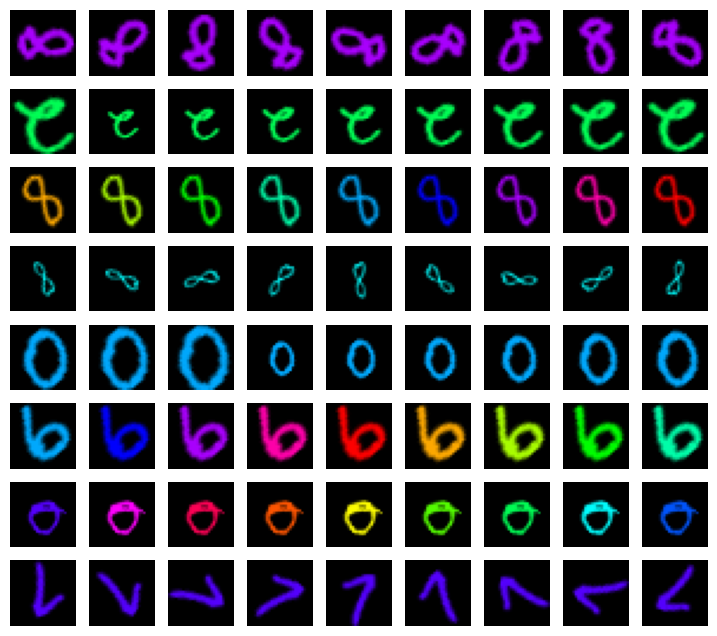

In [59]:
plot_sequence(imgs)

In [9]:
len(test_loader.dataset)

10000

(-0.5, 27.5, 27.5, -0.5)

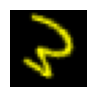

In [27]:


plt.figure(figsize=(1, 1))
plt.imshow(img[1, 0].permute(1, 2, 0).numpy())
plt.axis('off')
plt.sh

In [3]:
# At the top of your script
from tvae.data.transforms import To_Color

torch.save(train_loader, 'data_Lpartial_mnist/train_loader.pth')
torch.save(val_loader, 'data_Lpartial_mnist/val_loader.pth')
torch.save(test_loader, 'data_Lpartial_mnist/test_loader.pth')